# Project on Stand-up comedians

What makes Ali Wong's standup routine unique from other top standup comedians

# 1)- Importing key modules

In [0]:
# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
# Web scraping, pickle imports
import requests
from bs4 import BeautifulSoup
# processing
import pickle
import pandas as pd
# for data cleaning
import re
import string

# 2)- Getting the data 

In [0]:
# Scrapes transcript data from scrapsfromtheloft.com
def url_to_transcript(url):
    '''Returns transcript data specifically from scrapsfromtheloft.com.'''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find(class_="post-content").find_all('p')]
    print(url)
    return text

# URLs of transcripts in scope
urls = ['http://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/',
        'http://scrapsfromtheloft.com/2017/08/07/bo-burnham-2013-full-transcript/',
        'http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/',
        'http://scrapsfromtheloft.com/2017/10/21/hasan-minhaj-homecoming-king-2017-full-transcript/',
        'http://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-2016-full-transcript/']

# Comedian names
comedians = ['louis', 'dave', 'ricky', 'bo', 'bill', 'jim', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe']

In [5]:
transcripts = [url_to_transcript(u) for u in urls]

http://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/
http://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/
http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/
http://scrapsfromtheloft.com/2017/08/07/bo-burnham-2013-full-transcript/
http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/
http://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/
http://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/
http://scrapsfromtheloft.com/2017/10/21/hasan-minhaj-homecoming-king-2017-full-transcript/
http://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/
http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/
http://scrapsfromtheloft.com/2018/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/
http://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-

### Pickle files for later use

In [6]:
# Make a new directory to hold the text files
! mkdir transcripts
for i, c in enumerate(comedians):
     with open("transcripts/" + c + ".txt", "wb") as file:
      pickle.dump(transcripts[i], file)

mkdir: cannot create directory ‘transcripts’: File exists


In [0]:
# Load pickled files
data = {}
for i, c in enumerate(comedians):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [8]:
# Double check to make sure data has been loaded properly
data.keys()

dict_keys(['louis', 'dave', 'ricky', 'bo', 'bill', 'jim', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe'])

In [9]:
# More checks
data['louis'][:2]

['Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily agree with you, but I appreciate very much. Well, this is a nice place. This is easily the nicest place For many miles in every direction. That’s how you compliment a building And shit on a town with one sentence. It is odd around here, as I was driving here. There doesn’t seem to be any difference Between the sidewalk and the street for pedestrians here. People just kind of walk in the middle of the road. I love traveling And seeing all the different parts of the country. I live in New York. I live in a– There’s no value to your doing that at all.',
 '“The Old Lady And The Dog”\nI live– I live in New York. I always– Like, there’s this old lady in my neighborhood, And she’s always walking her dog. She’s always just– she’s very old. She just stands there just being old, And the dog just fights gravity every day, just– The two of them, it’s re

In [10]:
type(data)

dict

### Combine all the data 

In [11]:
# Let's take a look at our data again
next(iter(data.keys()))

'louis'

In [12]:
# Notice that our dictionary is currently in key: comedian, value: list of text format
next(iter(data.values()))

['Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily agree with you, but I appreciate very much. Well, this is a nice place. This is easily the nicest place For many miles in every direction. That’s how you compliment a building And shit on a town with one sentence. It is odd around here, as I was driving here. There doesn’t seem to be any difference Between the sidewalk and the street for pedestrians here. People just kind of walk in the middle of the road. I love traveling And seeing all the different parts of the country. I live in New York. I live in a– There’s no value to your doing that at all.',
 '“The Old Lady And The Dog”\nI live– I live in New York. I always– Like, there’s this old lady in my neighborhood, And she’s always walking her dog. She’s always just– she’s very old. She just stands there just being old, And the dog just fights gravity every day, just– The two of them, it’s re

In [0]:
# We are going to change this to key: comedian, value: string format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [0]:
# Combine it!
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

### Convert dictionary to dataframe

In [0]:
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']

In [16]:
# check now
data_df

,transcript
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ..."
ricky,Hello. Hello! How you doing? Great. Thank you. Wow. Calm down. Shut the fuck up. Thank you. What a lovely welcome. I’m gonna try my hardest tonigh...
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ..."
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello..."
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo..."
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa..."
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ..."
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s..."


In [0]:
data_df = data_df.sort_index()

In [18]:
data_df

,transcript
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ..."
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s..."
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ..."
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ..."
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa..."
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello..."
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ..."
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo..."
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...


We can save our data as csv file so that we do not need to run above code again and again. 

In [0]:
data_df=pd.read_csv('comedian_dataset_unclean.csv', encoding= 'utf-8')

In [20]:
data_df.shape

(12, 3)

In [21]:
data_df.head()

,Unnamed: 0,Unnamed: 0.1,transcript
0,0,ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ..."
1,1,anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s..."
2,2,bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ..."
3,3,bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...
4,4,dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ..."


In [0]:
# Rename column
data_df=data_df.rename(columns={'Unnamed: 0.1': 'name'})
# remove additional column and remember to save in a better way with index=false option
data_df.drop(['Unnamed: 0'], axis=1,inplace=True)

In [23]:
data_df

,name,transcript
0,ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ..."
1,anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s..."
2,bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ..."
3,bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...
4,dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ..."
5,hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa..."
6,jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello..."
7,joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ..."
8,john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo..."
9,louis,Intro\r\r\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessari...


In [0]:
# setting name column as index
data_df.set_index("name", inplace=True)

In [25]:
data_df

,transcript
name,
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ..."
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s..."
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ..."
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ..."
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa..."
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello..."
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ..."
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo..."


In [26]:
data_df.transcript.loc['ali']

"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming. Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an 18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through.\r\r\nAnd then, when they go to sleep, they just go

# 3)- Basic feature extraction 

- Number of words
- Number of characters
- Average word length
- Number of stopwords
- Number of special characters
- Number of numerics
- Number of uppercase words

### 3.1)- Number of words

In [27]:
data_df['word_count'] = data_df['transcript'].apply(lambda x: len(str(x).split(" ")))
data_df[['transcript','word_count']]

,transcript,word_count
name,,
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ...",7357
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s...",6713
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ...",12218
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...,7148
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ...",9145
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa...",10497
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello...",11094
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ...",9959
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo...",9298


### 3.2)-Number of characters

In [28]:
data_df['char_count'] = data_df['transcript'].str.len() ## this also includes spaces
data_df[['transcript','char_count']]

,transcript,char_count
name,,
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ...",38992
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s...",34526
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ...",64607
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...,38509
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ...",48109
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa...",56130
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello...",58688
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ...",53750
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo...",48514


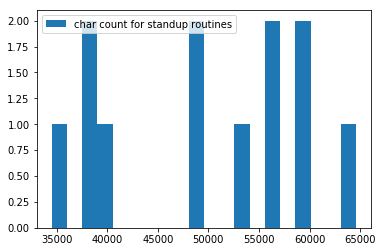

In [29]:
length_df = data_df['transcript'].str.len() 
plt.hist(length_df, bins=20, label="char count for standup routines") 
plt.legend() 
plt.show()

It is scattered. Let's check average word length

### 3.3)- Average Word Length

In [30]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

data_df['avg_word'] = data_df['transcript'].apply(lambda x: avg_word(x))
data_df[['transcript','avg_word']]

,transcript,avg_word
name,,
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ...",4.288234
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s...",4.135863
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ...",4.287936
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...,4.387521
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ...",4.244626
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa...",4.341043
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello...",4.288302
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ...",4.395743
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo...",4.214685


### 3.4)-Number of stopwords

In [31]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

data_df['stopwords'] = data_df['transcript'].apply(lambda x: len([x for x in x.split() if x in stop]))
data_df[['transcript','stopwords']]

,transcript,stopwords
name,,
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ...",2762
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s...",2299
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ...",4323
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...,2192
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ...",3118
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa...",3267
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello...",3898
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ...",3471
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo...",3483


### 3.5)-Number of special characters

In [33]:
# use hashtag as special word as it means some reference 
data_df['special-words'] = data_df['transcript'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
data_df[['transcript','special-words']]

,transcript,special-words
name,,
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ...",0
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s...",0
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ...",1
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...,1
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ...",0
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa...",5
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello...",0
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ...",0
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo...",0


### 3.6)-Number of numerics/digits

In [34]:
data_df['numerics'] = data_df['transcript'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data_df[['transcript','numerics']]

,transcript,numerics
name,,
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ...",10
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s...",6
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ...",32
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...,9
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ...",9
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa...",12
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello...",10
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ...",9
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo...",13


### 3.7)- Number of Uppercase words

In [35]:
data_df['upper'] = data_df['transcript'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
data_df[['transcript','upper']]

,transcript,upper
name,,
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ...",309
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s...",317
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ...",415
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...,264
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ...",410
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa...",486
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello...",406
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ...",207
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo...",324


# 4)- Cleaning data

Round 1: Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers/digits.

Round2:Get rid of some additional punctuation and non-sensical text that was missed the first time around.

In [0]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [37]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

,transcript
name,
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get thi...
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told ’em i was gonna tape my special...
bill,all right thank you thank you very much thank you thank you thank you how are you what’s going on thank you it’s a pleasure to be here in the gre...
bo,bo what old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort there a old macdonald had a farm e i e i o this i...
dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the alch...
hasan,what’s up davis what’s up i’m home i had to bring it back here netflix said “where do you want to do the special la chicago new york” i was like...
jim,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit down sit down sit down thank you boston i appre...
joe,ladies and gentlemen welcome joe rogan what the fuck is going on san francisco thanks for coming i appreciate it god damn put your phone down ...
john,all right petunia wish me luck out there you will die on august that’s pretty good all right hello hello chicago nice to see you again thank you...


check if it worked

In [38]:
data_df.transcript.loc['ali']

"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming. Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an 18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through.\r\r\nAnd then, when they go to sleep, they just go

In [39]:
data_clean.transcript.loc['ali']

'ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get this shit over with ’cause i have to pee in like ten minutes but thank you everybody so much for coming um… it’s a very exciting day for me it’s been a very exciting year for me i turned  this year yes thank you five people i appreciate that uh i can tell that i’m getting older because now when i see an  girl my automatic thought… is “fuck you” “fuck you i don’t even know you but fuck you” ‘cause i’m straight up jealous i’m jealous first and foremost of their metabolism because  girls they could just eat like shit and then they take a shit and have a sixpack right they got thatthat beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through\r\r\nand then when they go to sleep they just go to sleep right they don’t have insomnia yet they don’t know what it’s

In [0]:
# Apply a second round of cleaning
def clean_text_round2(text):
    
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [0]:
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))

In [42]:
print(data_clean.transcript.loc['ali'])

another thing a lot of my friends said to me when they were discouraging me from having a kid they were like why are you gonna have a kid why dont you just travel the world with your husband and just do whatever you want for the rest of your lives with no kid attached i was like yeah thats cool until my husband dies which hes definitely gonna before me because im a asian woman and therefore guaranteed to live until im a billion im guaranteed like a turtle from the galapagos ok we all know the phrase black dont crack well asian dont die we dont die especially the women we live forever and you know why were such bad drivers because were trying to die were like yeah let me see how invincible i really am imma make this left hand turn signal and ignore this red light completely im gonna make a right turn– i changed my mind its a uturn i changed my mind again its a oturn every time i get into a car accident im like oh my god not again i need to hide my face so that everybody doesnt see that 

In [43]:
data_clean

,transcript
name,
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get thi...
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told em i was gonna tape my special ...
bill,all right thank you thank you very much thank you thank you thank you how are you whats going on thank you its a pleasure to be here in the great...
bo,bo what old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort there a old macdonald had a farm e i e i o this i...
dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the alch...
hasan,whats up davis whats up im home i had to bring it back here netflix said where do you want to do the special la chicago new york i was like nah ...
jim,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit down sit down sit down thank you boston i appre...
joe,ladies and gentlemen welcome joe rogan what the fuck is going on san francisco thanks for coming i appreciate it god damn put your phone down ...
john,all right petunia wish me luck out there you will die on august thats pretty good all right hello hello chicago nice to see you again thank you ...


### Removing stop-words

In [44]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

data_clean['transcript'] = data_clean['transcript'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data_clean=data_clean['transcript']
data_clean = pd.DataFrame(data_clean)
data_clean

,transcript
name,
ali,ladies gentlemen please welcome stage ali wong hi hello welcome thank thank coming hello hello gonna get shit cause pee like ten minutes thank eve...
anthony,thank thank thank san francisco thank much good people surprised told em gonna tape special san francisco said would thats politically correct cit...
bill,right thank thank much thank thank thank whats going thank pleasure greater atlanta georgia area oasis nice dont know came june nice wasnt thinkin...
bo,bo old macdonald farm e e farm pig e e snort old macdonald farm e e bo burnham hes years old hes male looks like genetic product giraffe sex ellen...
dave,dave tells dirty jokes living stare hard work happens signifies profound train thought alchemists fire transforms fear tragedy levity livelihood d...
hasan,whats davis whats im home bring back netflix said want special la chicago new york like nah son davis california um good year recently got married...
jim,ladies gentlemen please welcome stage mr jim jefferies hello sit sit sit sit sit thank boston appreciate uh thats sweet love im end tour right im ...
joe,ladies gentlemen welcome joe rogan fuck going san francisco thanks coming appreciate god damn put phone fuckface see bitch put phone motherfuckers...
john,right petunia wish luck die august thats pretty good right hello hello chicago nice see thank nice thank look youre wonderful crowd need keep ener...


### Lemmatization

In [45]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [46]:
### 3rd round is of Lemmatization

from textblob import Word
data_clean['transcript'] = data_clean['transcript'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data_clean=data_clean['transcript']
data_clean = pd.DataFrame(data_clean)
data_clean

,transcript
name,
ali,lady gentleman please welcome stage ali wong hi hello welcome thank thank coming hello hello gonna get shit cause pee like ten minute thank everyb...
anthony,thank thank thank san francisco thank much good people surprised told em gonna tape special san francisco said would thats politically correct cit...
bill,right thank thank much thank thank thank whats going thank pleasure greater atlanta georgia area oasis nice dont know came june nice wasnt thinkin...
bo,bo old macdonald farm e e farm pig e e snort old macdonald farm e e bo burnham he year old he male look like genetic product giraffe sex ellen deg...
dave,dave tell dirty joke living stare hard work happens signifies profound train thought alchemist fire transforms fear tragedy levity livelihood dave...
hasan,whats davis whats im home bring back netflix said want special la chicago new york like nah son davis california um good year recently got married...
jim,lady gentleman please welcome stage mr jim jefferies hello sit sit sit sit sit thank boston appreciate uh thats sweet love im end tour right im ha...
joe,lady gentleman welcome joe rogan fuck going san francisco thanks coming appreciate god damn put phone fuckface see bitch put phone motherfucker ca...
john,right petunia wish luck die august thats pretty good right hello hello chicago nice see thank nice thank look youre wonderful crowd need keep ener...


### Checking word count

In [47]:
data_clean['word_count'] = data_clean['transcript'].apply(lambda x: len(str(x).split(" ")))
data_clean[['transcript','word_count']]

,transcript,word_count
name,,
ali,lady gentleman please welcome stage ali wong hi hello welcome thank thank coming hello hello gonna get shit cause pee like ten minute thank everyb...,3618
anthony,thank thank thank san francisco thank much good people surprised told em gonna tape special san francisco said would thats politically correct cit...,3363
bill,right thank thank much thank thank thank whats going thank pleasure greater atlanta georgia area oasis nice dont know came june nice wasnt thinkin...,6093
bo,bo old macdonald farm e e farm pig e e snort old macdonald farm e e bo burnham he year old he male look like genetic product giraffe sex ellen deg...,3474
dave,dave tell dirty joke living stare hard work happens signifies profound train thought alchemist fire transforms fear tragedy levity livelihood dave...,4692
hasan,whats davis whats im home bring back netflix said want special la chicago new york like nah son davis california um good year recently got married...,5334
jim,lady gentleman please welcome stage mr jim jefferies hello sit sit sit sit sit thank boston appreciate uh thats sweet love im end tour right im ha...,5401
joe,lady gentleman welcome joe rogan fuck going san francisco thanks coming appreciate god damn put phone fuckface see bitch put phone motherfucker ca...,5052
john,right petunia wish luck die august thats pretty good right hello hello chicago nice see thank nice thank look youre wonderful crowd need keep ener...,4551


We can see how much of text has been taken away. Ali had 7357 word count in original data. after cleaning, we have 3618.
Also our text is better distributed

### Number of characters

In [48]:
data_clean['char_count'] = data_clean['transcript'].str.len() ## this also includes spaces
data_clean[['transcript','char_count']]

,transcript,char_count
name,,
ali,lady gentleman please welcome stage ali wong hi hello welcome thank thank coming hello hello gonna get shit cause pee like ten minute thank everyb...,22313
anthony,thank thank thank san francisco thank much good people surprised told em gonna tape special san francisco said would thats politically correct cit...,19937
bill,right thank thank much thank thank thank whats going thank pleasure greater atlanta georgia area oasis nice dont know came june nice wasnt thinkin...,36603
bo,bo old macdonald farm e e farm pig e e snort old macdonald farm e e bo burnham he year old he male look like genetic product giraffe sex ellen deg...,20762
dave,dave tell dirty joke living stare hard work happens signifies profound train thought alchemist fire transforms fear tragedy levity livelihood dave...,28081
hasan,whats davis whats im home bring back netflix said want special la chicago new york like nah son davis california um good year recently got married...,31451
jim,lady gentleman please welcome stage mr jim jefferies hello sit sit sit sit sit thank boston appreciate uh thats sweet love im end tour right im ha...,32191
joe,lady gentleman welcome joe rogan fuck going san francisco thanks coming appreciate god damn put phone fuckface see bitch put phone motherfucker ca...,30548
john,right petunia wish luck die august thats pretty good right hello hello chicago nice see thank nice thank look youre wonderful crowd need keep ener...,27267


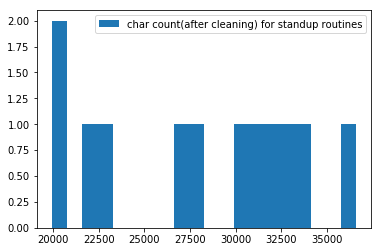

In [49]:
length_df = data_clean['transcript'].str.len() 
plt.hist(length_df, bins=20, label="char count(after cleaning) for standup routines") 
plt.legend() 
plt.show()

# 5)- Organizing The Data

- Corpus : a collection of text

- Document-Term Matrix - word counts in matrix format


### 5.1)- Corpus

In [50]:
# we shall keep all the words in our corpus. So, we won't use cleaned dataframe
data_df

,transcript,word_count,char_count,avg_word,stopwords,special-words,numerics,upper
name,,,,,,,,
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ...",7357,38992,4.288234,2762,0,10,309
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s...",6713,34526,4.135863,2299,0,6,317
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ...",12218,64607,4.287936,4323,1,32,415
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...,7148,38509,4.387521,2192,1,9,264
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ...",9145,48109,4.244626,3118,0,9,410
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa...",10497,56130,4.341043,3267,5,12,486
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello...",11094,58688,4.288302,3898,0,10,406
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ...",9959,53750,4.395743,3471,0,9,207
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo...",9298,48514,4.214685,3483,0,13,324


In [51]:
# Let's add the comedians' full names as well
full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

data_df['full_name'] = full_names
data_df

,transcript,word_count,char_count,avg_word,stopwords,special-words,numerics,upper,full_name
name,,,,,,,,,
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ...",7357,38992,4.288234,2762,0,10,309,Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s...",6713,34526,4.135863,2299,0,6,317,Anthony Jeselnik
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ...",12218,64607,4.287936,4323,1,32,415,Bill Burr
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...,7148,38509,4.387521,2192,1,9,264,Bo Burnham
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ...",9145,48109,4.244626,3118,0,9,410,Dave Chappelle
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa...",10497,56130,4.341043,3267,5,12,486,Hasan Minhaj
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello...",11094,58688,4.288302,3898,0,10,406,Jim Jefferies
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ...",9959,53750,4.395743,3471,0,9,207,Joe Rogan
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo...",9298,48514,4.214685,3483,0,13,324,John Mulaney


In [0]:
#pickle it for later use

data_df.to_pickle("corpus.pkl")

# Document-Term Matrix

- Each row is a different document i.e transcript in our case
- Each column is a different term i.e words. we didn't use bigram so , it will be only one word
- Values show word count i.e how many times a comedian has said that particular word

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
# use clean data for this purpose as we do not want any noise in our document term matrix
data_cv = cv.fit_transform(data_clean.transcript)

In [54]:
data_cv

<12x6582 sparse matrix of type '<class 'numpy.int64'>'
	with 15172 stored elements in Compressed Sparse Row format>

In [55]:
type(data_cv)

scipy.sparse.csr.csr_matrix

**Converting sparse to dense matrix**

A sparse matrix is a matrix that is comprised of mostly zero values. Sparse matrices are distinct from matrices with mostly non-zero values, which are referred to as dense matrices

if most of the elements are nonzero, then the matrix is considered dense.

In [0]:
dtm=data_cv.toarray()

In [57]:
type(dtm)

numpy.ndarray

In [58]:
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names()) # see how we are converting to array instead of dataframe
data_dtm.index = data_clean.index
data_dtm

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,ability,abject,able,ablebodied,abortion,abroad,absofuckinglutely,absolute,absolutely,absorb,absorbing,abstain,abuse,abused,academically,acc,accent,accept,acceptable,acceptance,accepted,access,accident,accidentally,accomplished,accomplishment,according,accordingly,accoutrement,accurate,accustomed,accutane,achieve,...,yelled,yelling,yellow,yelp,yep,yes,yesterday,yo,yoda,yoga,yogurt,yokel,yoko,yolanda,yolo,yooo,york,youd,youll,young,younger,youngest,youre,youth,youtube,youve,yulin,yummy,yyou,ze,zealand,zee,zen,zeppelin,zero,zillion,zombie,zoning,zoo,éclair
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ali,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,1,1,0,0,2,0,0,0,0,0,2,...,0,1,0,1,0,9,0,0,0,1,0,0,1,0,1,0,0,0,4,2,0,0,31,0,0,2,0,0,1,0,0,0,0,0,0,0,1,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,19,0,0,6,0,0,0,0,10,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,1,...,2,0,1,0,0,3,0,0,0,1,0,0,0,0,0,0,1,1,5,0,0,0,59,0,1,1,0,1,0,1,0,0,0,0,1,1,2,1,0,0
bo,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,3,0,0,2,0,0,0,1,0,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,5,0,5,0,0,0,0,0,0,0,1,0,2,2,5,0,0,19,0,0,9,0,0,0,0,0,0,0,0,1,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,7,0,1,0,0,0,0,0,0,0,0,1,7,3,10,0,0,15,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,...,0,1,0,0,0,4,0,4,1,1,3,1,0,0,1,0,12,2,3,0,1,0,51,0,0,8,0,0,0,0,0,2,1,0,1,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,1,2,0,3,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,2,2,0,0,0,48,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,4,0,1,42,0,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,2,0,0,1,0,0,0,1,0,0,0,0,...,1,1,1,0,0,11,0,0,0,0,0,0,0,0,0,0,7,2,1,2,1,0,28,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Save work for future work

In [0]:
data_dtm.to_pickle("dtm.pkl")
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))